# Exercício sobre redes neurais convolucionais

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu exercício seja salvo.
2. Quando você terminar o exercício, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este exercício e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**: Hyago Vieira Lemes Barbosa Silva

**Matrícula**: 922

## Exercício

### 1)  Neste exercício, você irá utilizar a biblioteca tensorflow para criar redes neurais para a classificação de objetos.

Utilizaremos a base de dados conhecida como CIFAR10. Ela possui 60.000 imagens **coloridas** com dimensão $32 \times 32 \times 3$, ou seja, elas têm 3 dimensões (ou canais), uma para cada uma das três cores, RGB (vermelho, verde e azul).

Usaremos 50.000 imagens para treinamento e 10.000 imagens para validação. As imagens pertencem a 10 classes, as quais são listadas abaixo.

| Rótulo |  Descrição |
|:------:|:----------:|
|    0   |  airplane  |
|    1   | automobile |
|    2   |    bird    |
|    3   |     cat    |
|    4   |    deer    |
|    5   |     dog    |
|    6   |    frog    |
|    7   |    horse   |
|    8   |    ship    |
|    9   |    truck   |


1. Execute a célula de código abaixo para baixar a base de dados e analise as imagens geradas.

170498071/170498071 [==============================] - 10s 0us/step


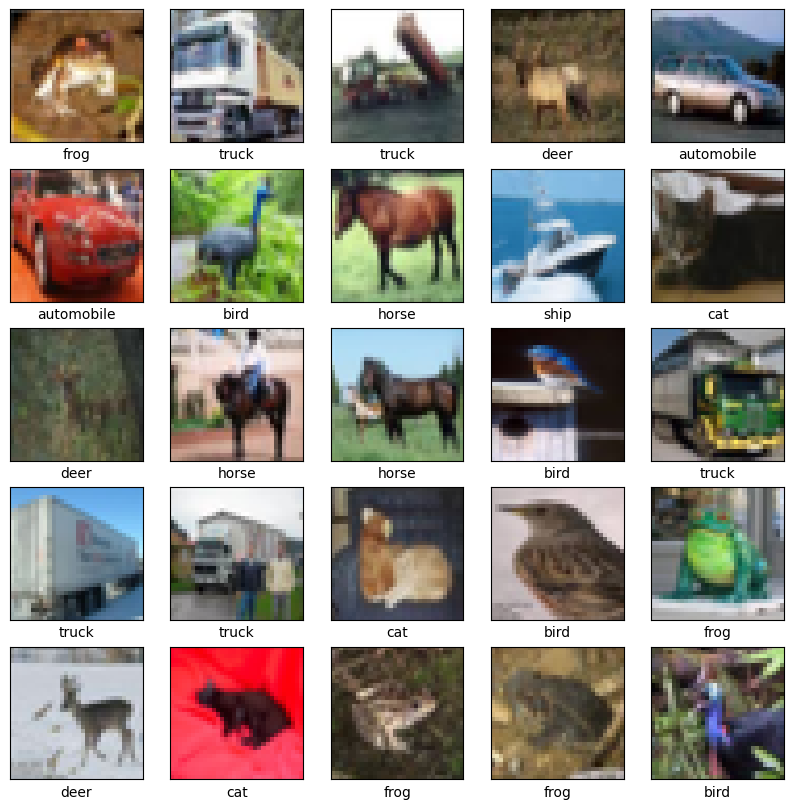

In [2]:
# TensorFlow
import tensorflow as tf

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Reshaping the label arrays.
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

# Defining the class names.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Showing the first 25 images.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [2]:
train_images.shape

(50000, 32, 32, 3)

In [3]:
test_labels.shape

(10000,)

2. Normalize os conjuntos de treinamento e validação.

**DICAS**

+ Como os valores dos pixels estão entre 0 e 255, divida por 255 para normalizar os conjuntos.
+ Se baseie no código do seguinte exemplo: [Introdução ao Tensorflow](https://colab.research.google.com/github/zz4fap/tp557-iot-ml/blob/main/examples/introdu%C3%A7%C3%A3o_ao_tensorflow.ipynb).

In [3]:
# Digite aqui o código do exercício.
train_images = train_images / 255.0

test_images = test_images / 255.0

3. Crie uma rede neural densa, usando a API `Sequential` do Tensorflow.

**DICAS**

+ Lembre-se que as imagens têm as seguintes dimensões $32\times32\times3$.
+ Use o mesmo modelo do exemplo abaixo, apenas mude as dimensões de entrada da camada de "achatamento" (*flatten*).
+ A camada `Flatten` espera como `input_shape` as dimensões exatas das imagens, ou seja, $32\times32\times3$.
+ Se baseie no código do seguinte exemplo: [Introdução ao Tensorflow](https://colab.research.google.com/github/zz4fap/tp557-iot-ml/blob/main/examples/introdu%C3%A7%C3%A3o_ao_tensorflow.ipynb).

## Modelo menos inteligente

5. Treine o modelo por 25 épocas e armazene o histórico de valores da função de custo e da acurácia ao longo das épocas de treinamento. Passe o conjunto de validação para o modelo.

**DICAS**

+ Se baseie no código do seguinte exemplo: [Introdução ao Tensorflow](https://colab.research.google.com/github/zz4fap/tp557-iot-ml/blob/main/examples/introdu%C3%A7%C3%A3o_ao_tensorflow.ipynb).

In [24]:
model_sugest = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [25]:
model_sugest.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_sugest = model_sugest.fit(train_images, train_labels, epochs=25, validation_data=(test_images,test_labels))

Epoch 1/25
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8951 - accuracy: 0.3091 - val_loss: 1.7693 - val_accuracy: 0.3554
Epoch 2/25
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7100 - accuracy: 0.3826 - val_loss: 1.6856 - val_accuracy: 0.3967
Epoch 3/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6391 - accuracy: 0.4114 - val_loss: 1.6194 - val_accuracy: 0.4152
Epoch 4/25
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5909 - accuracy: 0.4257 - val_loss: 1.5861 - val_accuracy: 0.4380
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5619 - accuracy: 0.4395 - val_loss: 1.5328 - val_accuracy: 0.4533
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5347 - accuracy: 0.4503 - val_loss: 1.5257 - val_accuracy: 0.4487
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5073 - accuracy: 0.4586 - val_loss: 1.5293 - va

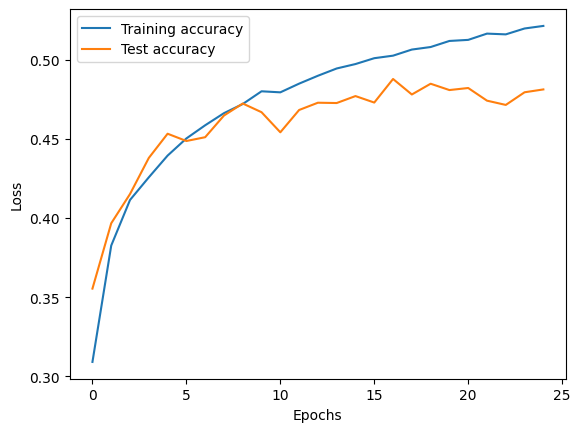



Época de valor máximo 16


In [30]:
plt.plot(history_sugest.history['accuracy'],label="Training accuracy")
plt.plot(history_sugest.history['val_accuracy'],label="Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print('\n\nÉpoca de valor máximo',np.argmax(history_sugest.history['val_accuracy']))

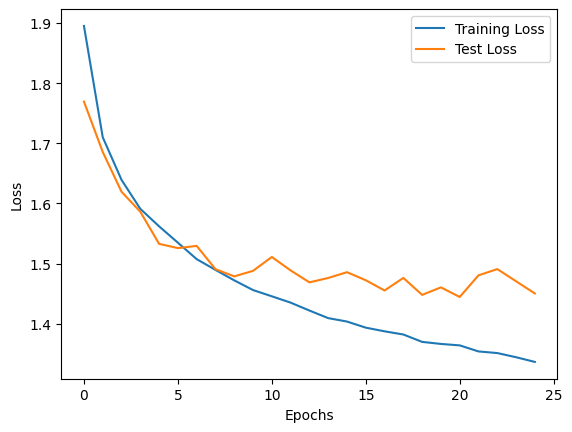



Época de valor mínimo 20


In [31]:
plt.plot(history_sugest.history['loss'],label="Training Loss")
plt.plot(history_sugest.history['val_loss'],label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
print('\n\nÉpoca de valor mínimo',np.argmin(history_sugest.history['val_loss']))

6. Após o treinamento, responda:

    1. Qual foi a acurácia atingida?
    
    2. Ela poderia ser maior?
    
    3. Como podemos aumentar a acurácia do modelo?

**Resposta**

<font color='blue'>
<span>

- 1.  A acurácia foi de accuracy: 0.5214 val_accuracy: 0.4813

- 2.  Sim poderia

- 3.  No caso precisamos incluir outras camadas, como exemplo abaixo, sendo estas camadas, de maxPolling, em seguida de camadas de convolução, para filtragem e retiradas de informações com menos detalhes para mais detalhes. Também camadas de dropout, que faça com que tenhamos treinamentos com certas quantidade de neurônios desligados hora ou outra eles ativando, assim evitando overfitting, e também ajustando a um modelo melhor generalista.

</span>

## Modelo um pouco mais inteligente

In [18]:
# Digite aqui o código do exercício.
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = tf.keras.Sequential()
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(2,2), activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 31, 31, 128)       1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               819328    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                      

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images,test_labels))

Epoch 1/15
1563/1563 [==============================] - 311s 198ms/step - loss: 1.5090 - accuracy: 0.4526 - val_loss: 1.1904 - val_accuracy: 0.5805
Epoch 2/15
1563/1563 [==============================] - 307s 197ms/step - loss: 1.1216 - accuracy: 0.6064 - val_loss: 1.0000 - val_accuracy: 0.6502
Epoch 3/15
1563/1563 [==============================] - 308s 197ms/step - loss: 0.9705 - accuracy: 0.6619 - val_loss: 0.9567 - val_accuracy: 0.6616
Epoch 4/15
1563/1563 [==============================] - 306s 196ms/step - loss: 0.8775 - accuracy: 0.6939 - val_loss: 0.9145 - val_accuracy: 0.6772
Epoch 5/15
1563/1563 [==============================] - 314s 201ms/step - loss: 0.8030 - accuracy: 0.7226 - val_loss: 0.9087 - val_accuracy: 0.6820
Epoch 6/15
1563/1563 [==============================] - 314s 201ms/step - loss: 0.7405 - accuracy: 0.7434 - val_loss: 0.8922 - val_accuracy: 0.6942
Epoch 7/15
1563/1563 [==============================] - 308s 197ms/step - loss: 0.6829 - accuracy: 0.7630 - val_

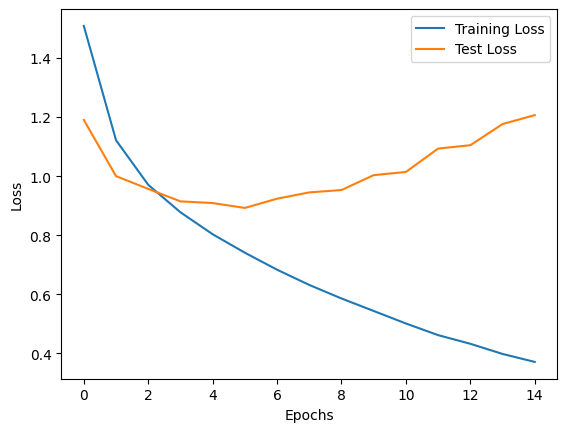



Época de valor mínimo 5


In [28]:
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
print('\n\nÉpoca de valor mínimo',np.argmin(history.history['val_loss']))

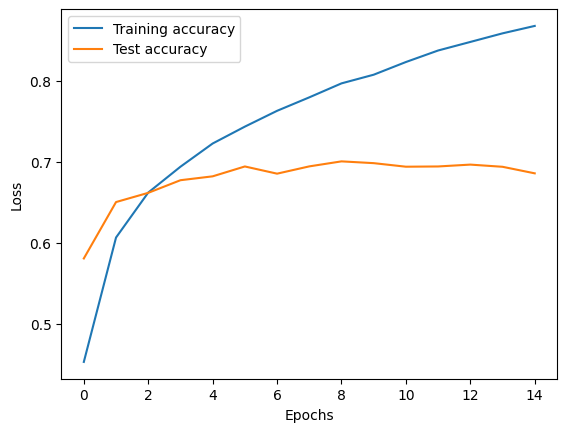



Época de valor máximo 8


In [29]:
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print('\n\nÉpoca de valor máximo',np.argmax(history.history['val_accuracy']))

7. Analise e execute o trecho de código abaixo para treinar uma rede neural convolucional, que é uma arquitetura mais adequada ao problema da classificação de imagens, como é o caso da base de dados CIFAR10.

O modelo configurado abaixo é baseado em uma arquitetura conhecida como VGG (Visual Geometry Group), também conhecida como VGGNet, uma arquitetura clássica de rede neural convolucional (Convolutional Neural Network - CNN). Para mais informações sobre esta arquitetura, acesse: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/

Esta arquitetura de rede neural utiliza camadas convolucionais, de max. pooling e densas.

A classe `Conv2D` é uma camada de convolução bidimensional, que é amplamente utilizada em redes neurais convolucionais (CNNs) para processamento de imagens e dados com estrutura semelhante a grade (como imagens, mapas de calor, séries temporais 2D, etc.). Esta camada aplica uma operação de convolução a uma entrada 2D, geralmente uma imagem. O parâmetro `padding` pode ser configurado como `valid` ou `same`:
+ Quando se define o `padding` como `valid`, nenhum preenchimento é adicionado à entrada antes da aplicação da convolução. Isso resulta em uma saída menor do que a entrada original. A saída terá dimensões menores do que a entrada, uma vez que partes das bordas da entrada não são cobertas pela convolução.
+ Quando se define o `padding` como `same`, é adicionado preenchimento à entrada de forma que a saída tenha a mesma altura e largura que a entrada original. O preenchimento é adicionado às bordas da entrada para que o filtro de convolução possa se mover completamente sobre a entrada. Isso garante que a saída tenha a mesma resolução espacial (altura e largura) que a entrada original. O preenchimento é calculado automaticamente para atingir esse objetivo e envolve a adição de zeros (zero-padding) nas bordas da entrada.

Para mais informações, acesse a documentação da classe [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/).

A classe `MaxPooling2D` é usada em CNNs para realizar operações de max pooling em dados bidimensionais, como imagens ou mapas de características. O max pooling é uma operação de redução de amostragem que ajuda a reduzir a dimensionalidade dos dados, tornando as características mais proeminentes e mantendo as informações mais importantes. Na operação de max pooling, uma janela (kernel) se desloca pela entrada e, para cada posição, seleciona o valor máximo dentro da janela. Para mais informações, acesse a documentação da classe [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/).

**DICAS**

+ Note que este modelo se chama `model2`.
+ Leia a documentação da camada [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/).
+ Leia a documentação da camada [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/).
+ Habilite o uso de GPU para acelerar o treinamento do modelo (Editar -> Configurações de notebook -> GPU).
+ Se baseie no código do seguinte exemplo: [Introdução ao Tensorflow](https://colab.research.google.com/github/zz4fap/tp557-iot-ml/blob/main/examples/introdu%C3%A7%C3%A3o_ao_tensorflow.ipynb).

In [4]:
# Define VGG model.
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the VGG model.
history2 = model2.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=25)

Epoch 1/25
782/782 [==============================] - 380s 482ms/step - loss: 1.3850 - accuracy: 0.5005 - val_loss: 1.0815 - val_accuracy: 0.6195
Epoch 2/25
782/782 [==============================] - 377s 483ms/step - loss: 0.8930 - accuracy: 0.6896 - val_loss: 0.8550 - val_accuracy: 0.7010
Epoch 3/25
782/782 [==============================] - 383s 490ms/step - loss: 0.6944 - accuracy: 0.7564 - val_loss: 0.7676 - val_accuracy: 0.7371
Epoch 4/25
782/782 [==============================] - 376s 481ms/step - loss: 0.5659 - accuracy: 0.8027 - val_loss: 0.7582 - val_accuracy: 0.7407
Epoch 5/25
782/782 [==============================] - 370s 473ms/step - loss: 0.4654 - accuracy: 0.8377 - val_loss: 0.7385 - val_accuracy: 0.7603
Epoch 6/25
782/782 [==============================] - 370s 474ms/step - loss: 0.3763 - accuracy: 0.8685 - val_loss: 0.7346 - val_accuracy: 0.7723
Epoch 7/25
782/782 [==============================] - 371s 474ms/step - loss: 0.3004 - accuracy: 0.8940 - val_loss: 0.7963 -

8. Use as informações contidas no objeto do tipo `History` do segundo modelo (`model2`) para plotar uma figura do erro e acurácia em função das épocas de treinamento para os conjuntos de treinamento e validação.

**DICAS**

+ O objeto da classe `History` do segundo modelo (`model2`) armazena também as informações de loss e accuracy calculadas com o conjunto de validação.
+ Para acessar os valores de loss do conjunto de validação, indexe o dicionário `history` com a chave `val_loss`.
+ Para acessar os valores de acurácia do conjunto de validação, indexe o dicionário `history` com a chave `val_accuracy`.

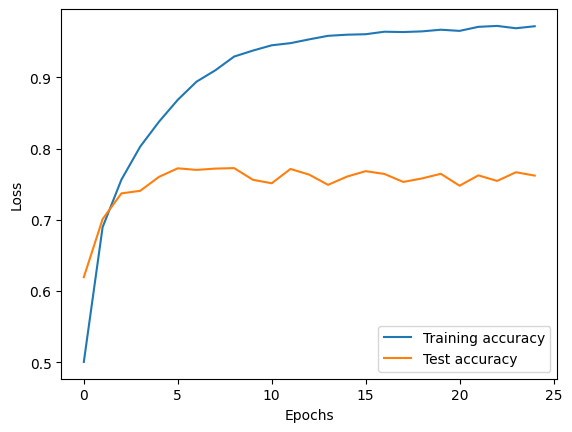



Época de valor máximo 8


In [5]:
# Digite aqui o código do exercício.
plt.plot(history2.history['accuracy'],label="Training accuracy")
plt.plot(history2.history['val_accuracy'],label="Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print('\n\nÉpoca de valor máximo',np.argmax(history2.history['val_accuracy']))

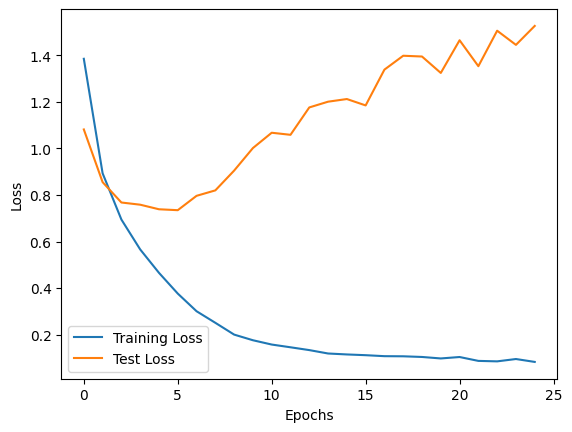



Época de valor mínimo 5


In [6]:
plt.plot(history2.history['loss'],label="Training Loss")
plt.plot(history2.history['val_loss'],label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
print('\n\nÉpoca de valor mínimo',np.argmin(history2.history['val_loss']))

9. Analise o gráfico com os valores de *loss*. Comparando a curva de *loss* para o conjunto de treinamento com a curva de *loss* para o conjunto de validação, o que podemos concluir sobre o comportamento do modelo?

**DICAS**

+ Analise se o mofdelo esta subajustando ou sobreajustando.

**Resposta**

<span style="color:blue">

Não melhorou muito, mesmo com toda confuguração, podemos concluir que a rede ainda precisa ser reajustada, sobre algumas coisas. Vemos que houve um aprendizado e após 5 épocas o loss para validação explodiu, e assim o aprendizado começou a viciar, e ter um pequeno overfitting. O modelo que fiz sem ser o mais básico ficou quase da mesma eficiência que este. É possível verificar que o modelo ja chegou em um valor ótimo muito rápido e não melhorou disso, isso é devido a também não ter desligado alguns neurônios como a técnica que será aplicada agora no outro modelo, isto torna a rede menos propença a ter overfitting.
</span>

10. Avalie a acurácia do segundo modelo no conjunto de validação.

**DICAS**

+ Se baseie no código do seguinte exemplo: [Introdução ao Tensorflow](https://colab.research.google.com/github/zz4fap/tp557-iot-ml/blob/main/examples/introdu%C3%A7%C3%A3o_ao_tensorflow.ipynb).

In [7]:
# Digite aqui o código do exercício.
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)

print('Teste da acurácia:', test_acc,'\n')

print('Teste do loss:', test_loss)

313/313 - 20s - loss: 1.5263 - accuracy: 0.7621 - 20s/epoch - 64ms/step
Teste da acurácia: 0.7620999813079834 

Teste do loss: 1.5262696743011475


11. Plote a matriz de confusão para o conjunto de validação.

**DICAS**

+ Se baseie no código do seguinte exemplo: [Introdução ao Tensorflow](https://colab.research.google.com/github/zz4fap/tp557-iot-ml/blob/main/examples/introdu%C3%A7%C3%A3o_ao_tensorflow.ipynb).

In [8]:
predictions = model2.predict(test_images)
predictions[0]

313/313 [==============================] - 20s 62ms/step


array([2.4576496e-10, 1.6697267e-14, 3.0491564e-11, 9.9999863e-01,
       3.3921214e-07, 8.8458005e-09, 3.2613468e-07, 9.4804795e-09,
       6.0212710e-07, 5.6931922e-16], dtype=float32)

In [9]:
value = np.argmax(predictions[0])
value

3

313/313 [==============================] - 24s 76ms/step


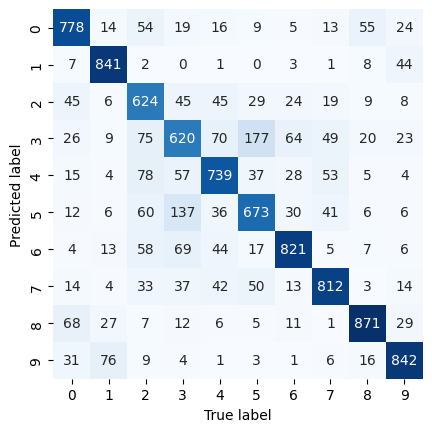

In [10]:
# Digite aqui o código do exercício.
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model2.predict(test_images), axis=1)

# Plot the confusion matrix.
mat = confusion_matrix(test_labels, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(10), yticklabels=range(10), cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

12. O que poderia ser feito para melhorar o desempenho do segundo modelo no conjunto de validação?

**DICAS**

+ Leia os seguintes artigos:
  + [Técnicas para evitar o sobreajuste](https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html)
  + [Sobreajuste em CNNs](https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/)
  + [Overfitting e Regularização](https://www.deeplearningbook.com.br/overfitting-e-regularizacao-parte-1/)
  + [Por que a regularizacao reduz o overfitting?](https://www.deeplearningbook.com.br/afinal-por-que-a-regularizacao-ajuda-a-reduzir-o-overfitting/)
  + [Como funciona o dropout?](https://www.deeplearningbook.com.br/capitulo-23-como-funciona-o-dropout/)

**Resposta**

<span style="color:blue">

Poderia ser analisado melhores hiperparâmetros, para verificar um modelo que se ajustasse parâmetros melhores. Filtros mais eficientes. Também temos outras técnicas de sobreajuste ou overfitting, que poderia ser aplicada, regularização sobre os dados também poderia ser feita, o fato da cor não ser uma característica tão eficaz pois aqui nãoa se avalia a cor, podemos ter um carro ou caminhão marrom e um cavalo também, isso dificulta ainda mais, portanto poderia ser feito uma filtragem nas cores, e passar para escala de cinza. Podemos também simplificar o modelo, utilizar early stop, aumentar a quantidade de dados, utilizar data agumentation, regularização aplicar outras linhas de droppout e prunnig, enfim, também poderíamos utilizar um modelo pré treinado e assim utilizar já de redes e aplicar os conceitos de transfer learning, isso torna um modelo mais eficaz, e aumenta a acurácia e torna o valor de erro muito baixo, congelando camadas de aprendizado, treinando modelo com o modelo já pré treinado e obtendo melhores resultados.
</span>

13. Neste exercício iremos utilizar uma técnica de regularização conhecida como *dropout*. Analise e execute a célula de código abaixo.

Dropout é uma técnica simples que elimina nós aleatoriamente da rede. Ela tem um efeito de regularização, pois os nós restantes devem se adaptar para compensar a folga criada pelos nós removidos. O *dropout* é adicionado ao modelo como camadas chamadas *Dropout*.

Para saber mais sobre esta técnica de regularização, acesse: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


A classe `Dropout` é usada em redes neurais para regularização, especialmente para combater o sobreajuste (i.e., overfitting). A regularização é uma técnica que ajuda a evitar que uma rede neural aprenda muito bem os dados de treinamento, mas tenha dificuldade em generalizar para dados não vistos. Ela funciona descartando aleatoriamente (ou "abandonando") uma fração especificada de neurônios da camada durante cada passagem de treinamento. Isso significa que esses neurônios não contribuirão para o cálculo dos gradientes ou atualizações de pesos durante o treinamento. A taxa de abandono (`rate`) é uma fração dos neurônios da camada que será desativada durante cada passagem de treinamento. Por exemplo, uma taxa de abandono de 0.5 significa que metade dos neurônios será desativada aleatoriamente a cada passagem. Para mais informações, acesse a documentação da classe [Dropout](https://keras.io/api/layers/regularization_layers/dropout/).

In [11]:
# Define VGG model com dropout.
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the VGG model.
history3 = model3.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=25)

Epoch 1/25
782/782 [==============================] - 451s 575ms/step - loss: 1.6659 - accuracy: 0.3856 - val_loss: 1.2078 - val_accuracy: 0.5703
Epoch 2/25
782/782 [==============================] - 444s 568ms/step - loss: 1.1847 - accuracy: 0.5757 - val_loss: 0.9734 - val_accuracy: 0.6543
Epoch 3/25
782/782 [==============================] - 380s 486ms/step - loss: 0.9739 - accuracy: 0.6575 - val_loss: 0.8549 - val_accuracy: 0.6985
Epoch 4/25
782/782 [==============================] - 380s 486ms/step - loss: 0.8494 - accuracy: 0.7045 - val_loss: 0.7673 - val_accuracy: 0.7368
Epoch 5/25
782/782 [==============================] - 379s 485ms/step - loss: 0.7660 - accuracy: 0.7323 - val_loss: 0.7057 - val_accuracy: 0.7548
Epoch 6/25
782/782 [==============================] - 380s 486ms/step - loss: 0.6991 - accuracy: 0.7564 - val_loss: 0.6982 - val_accuracy: 0.7574
Epoch 7/25
782/782 [==============================] - 380s 486ms/step - loss: 0.6474 - accuracy: 0.7730 - val_loss: 0.6634 -

14. Use as informações contidas no objeto do tipo `History` do terceiro modelo (`model3`) para plotar uma figura do erro/acurácia em função das épocas de treinamento para os conjuntos de treinamento e validação.

**DICAS**

+ O objeto da classe `History` do segundo modelo armazena também as informações de loss e accuracy calculadas com o conjunto de validação.
+ Para acessar os valores de loss do conjunto de validação, indexe o dicionário `history` com a chave `val_loss`.
+ Para acessar os valores de acurácia do conjunto de validação, indexe o dicionário `history` com a chave `val_accuracy`.

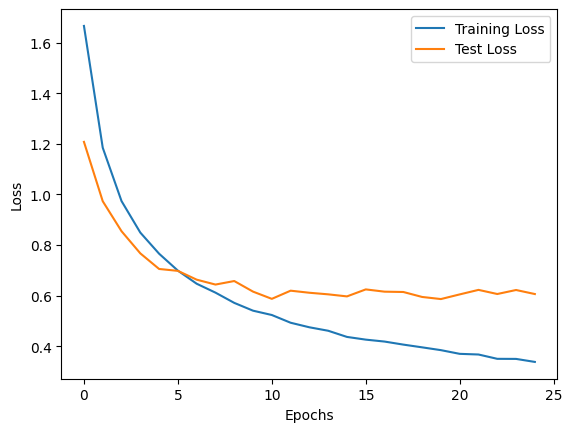



Época de valor mínimo 19


In [14]:
# Digite aqui o código do exercício.
plt.plot(history3.history['loss'],label="Training Loss")
plt.plot(history3.history['val_loss'],label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
print('\n\nÉpoca de valor mínimo',np.argmin(history3.history['val_loss']))


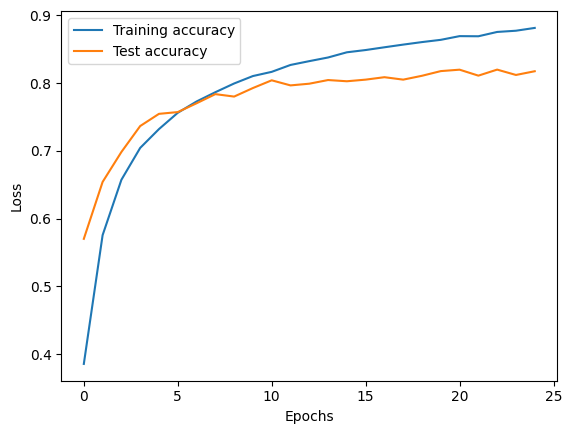



Época de valor máximo 22


In [15]:
# Digite aqui o código do exercício.
plt.plot(history3.history['accuracy'],label="Training accuracy")
plt.plot(history3.history['val_accuracy'],label="Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print('\n\nÉpoca de valor máximo',np.argmax(history3.history['val_accuracy']))

15. Analise o gráfico com os valores de *loss*. Comparando a curva de *loss* para o conjunto de treinamento com a curva de *loss* para o conjunto de validação, o que podemos concluir sobre o comportamento do modelo?

**DICAS**

+ Compare os resultados de *loss* obtidos acima com os resultados de *loss* obtidos quando não houve regularização do modelo.
+ Analise se está ocorrendo subajuste ou sobreajuste.
+ Com relação aos resultados obtidos anteriormente sem regularização, houve alguma melhoria?

**Resposta**

<span style="color:blue">
Totalmente diferente, observa-se que temos uma linha de tendência contínua, e que tanto o treinamento quanto a validação, obtiveram valores bons, e isto foi basicamente ter adicionado a camada de dropout, analisando os resutados anteriores, foi um ajuste muito rápido e estabilizou, agora aqui não vemos isto, temos um ajuste gradual, e de qualidade. Não houve sobreajuste nem subajuste, o modelo é complexo, e também agora possui parâmetros que auxiliam para que não haja mais overfitting que houve anteriormente. Houve sim, o modelo possui mais eficiência, agora ele não estabilizou o aprendizado e os neurônios provavelmente possuem pesos maiores, do que sem as camadas de dropout, com isso a rede inteira aprende, e por ser complexa, conseguimos fazer com que ela não tenha camadas ou neurônios sem utilidade devido ao baixo valor de pesos nas atualizações não causando efeito no aprendizado do modelo.

</span>

In [16]:
# Digite aqui o código do exercício.
test_loss, test_acc = model3.evaluate(test_images, test_labels, verbose=2)

print('Teste da acurácia:', test_acc,'\n')

print('Teste do loss:', test_loss)

313/313 - 17s - loss: 0.6066 - accuracy: 0.8177 - 17s/epoch - 55ms/step
Teste da acurácia: 0.8177000284194946 

Teste do loss: 0.6066163182258606


In [17]:
predictions = model3.predict(test_images)
predictions[0]

313/313 [==============================] - 19s 59ms/step


array([7.3407534e-07, 1.4803543e-07, 3.0768518e-07, 4.5660266e-01,
       6.3695569e-07, 5.4333425e-01, 1.0016277e-06, 1.6543929e-05,
       4.3566335e-05, 1.3255783e-07], dtype=float32)

In [18]:
value = np.argmax(predictions[0])
value

5

313/313 [==============================] - 20s 64ms/step


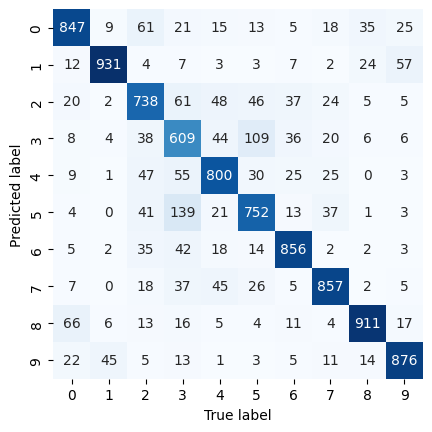

In [19]:
# Digite aqui o código do exercício.
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model3.predict(test_images), axis=1)

# Plot the confusion matrix.
mat = confusion_matrix(test_labels, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(10), yticklabels=range(10), cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

16. Analise os resultados da matriz de confusão para o conjunto de validação. Você consegue identificar erros que devem ser causados por as classes serem similares? Se sim, quais são essas classes similares?

**Resposta**

<span style="color:blue">Pela matriz de convolução podemos ver alguns, mas antes disso veja abaixo sobre os labels


 - 1- Cachorro possui orelhas nariz 4 pernas, quadrupede, tem pelagem, dentes, são parecidos veja o True Label deste 3 (cat) com 5 (dog).
 - 2- O mesmo vale para o contrário o True Label 5 para o dog e 3 para o gato, que se parece, porém o cachorro se pareceu mais com o gato do que o contrário.


 - 3 Automobile automóvel, com o truck que é o caminhão se parecem mas nem tanto, é outra análise.
 - 4 o airplane, que é um avião, dependendo da visualização que tiver, pode parecer com um banco, foi um que teve um valor alto também, no caso, mesmo não fazendo sentido algum.
 - 5 Outro que se assemelha porém não foi tão alto, o deer que seria um viado, com cavalo são parecidos se podemos falar por cima
 O restante não se parece tanto!  

| Rótulo |  Descrição |
|:------:|:----------:|
|    0   |  airplane  |
|    1   | automobile |
|    2   |    bird    |
|    3   |     cat    |
|    4   |    deer    |
|    5   |     dog    |
|    6   |    frog    |
|    7   |    horse   |
|    8   |    ship    |
|    9   |    truck   |
</span>

# Referência

[1] Jason Brownlee, "How to Develop a CNN From Scratch for CIFAR-10 Photo Classification", https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/